### Problem statement :-
### Use any machine learning method to classify the email dataset

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading Dataset

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


#### checking count of values which are null 

In [3]:
df.isnull()

,Unnamed: 0,label,text,label_num
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
5166,False,False,False,False
5167,False,False,False,False
5168,False,False,False,False
5169,False,False,False,False


#### dropping unnamed column 

In [4]:
df.drop("Unnamed: 0", axis=1,inplace=True)

##### dropping label column because its just telling wheather a mail is spam or not by using spam,ham and label_num also doing same thing

In [5]:
df.drop("label", axis=1, inplace=True)

#### now all extra column are removed 

In [6]:
df

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,Subject: industrial worksheets for august 2000...,0


#### appending Length to df which helps to get len of each mail

In [7]:
len(df.text[0])

327

In [8]:
df['Length']=df['text'].apply(len)
df

,text,label_num,Length
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
3,"Subject: photoshop , windows , office . cheap ...",1,414
4,Subject: re : indian springs\r\nthis deal is t...,0,336
...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402
5169,Subject: industrial worksheets for august 2000...,0,573


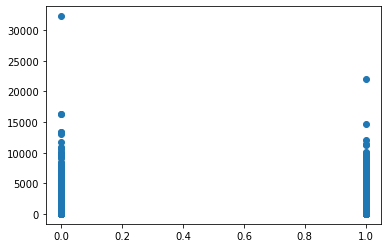

In [9]:
#visualizing relation between mail length and its label 
plt.scatter(df.label_num, df.Length)
plt.show()

### using regular expression to clean mail and appending it to df

In [10]:
import re

def mailprocess(text):
    text= text.replace('\r',' ')
    text = text.replace('\n', ' ')
    text = text.replace('#', '')
    text = text.replace("Subject:","")
    text = text.replace("we 're", "we are")
    text = text.replace("ect","etc")
    text = text.replace("you 're","you are")
    return text
    

In [11]:
df['clean_text'] = df['text'].map(mailprocess)
df

,text,label_num,Length,clean_text
0,Subject: enron methanol ; meter # : 988291\r\n...,0,327,enron methanol ; meter : 988291 this is a f...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,"hpl nom for january 9 , 2001 ( see attached ..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,"neon retreat ho ho ho , we ' re around to th..."
3,"Subject: photoshop , windows , office . cheap ...",1,414,"photoshop , windows , office . cheap . main t..."
4,Subject: re : indian springs\r\nthis deal is t...,0,336,re : indian springs this deal is to book the...
...,...,...,...,...
5166,Subject: put the 10 on the ft\r\nthe transport...,0,534,put the 10 on the ft the transport volumes d...
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0,1114,3 / 4 / 2000 and following noms hpl can ' t ...
5168,Subject: calpine daily gas nomination\r\n>\r\n...,0,402,"calpine daily gas nomination > > julie , a..."
5169,Subject: industrial worksheets for august 2000...,0,573,industrial worksheets for august 2000 activit...


### Data Visualization(most common words in clean_text column)

In [12]:
from wordcloud import WordCloud, STOPWORDS

In [13]:
comment_word = ''
stopwords= set(STOPWORDS)

In [14]:
#Loop through the email dataset and go through the "text" column
for val in df.clean_text:
    tokens=  val.strip().split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_word += " ".join(tokens)+" "

In [15]:
wc = WordCloud(width=2000, height=1000, background_color='white', stopwords=stopwords, min_font_size=12).generate(comment_word)

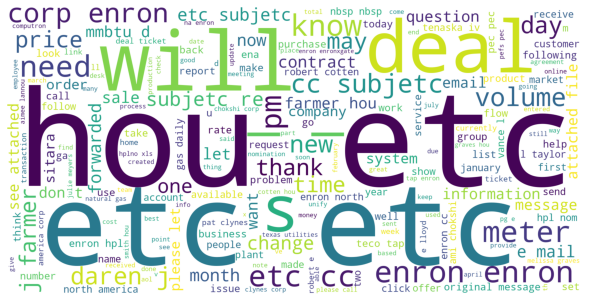

In [16]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### converting Clean text to count vector

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(ngram_range=(1,1))
count= count_vect.fit_transform(df['clean_text'])
print(count.shape)

(5171, 50446)


In [18]:
x=count
y=df['label_num'].values
print(y)

[0 0 0 ... 0 0 1]


### Splitting x,y into train and test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

### using naive bayes classifier

In [22]:
gNB = GaussianNB()

In [23]:
y_pred=gNB.fit(x_train.toarray(), y_train).predict(x_test.toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       732
           1       0.97      0.90      0.94       303

    accuracy                           0.96      1035
   macro avg       0.96      0.95      0.95      1035
weighted avg       0.96      0.96      0.96      1035



### Confusion Matrix

In [24]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[723,   9],
       [ 29, 274]], dtype=int64)

In [25]:
cm

array([[723,   9],
       [ 29, 274]], dtype=int64)

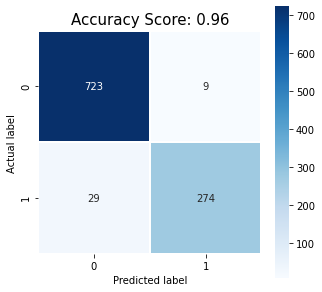

In [26]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=1.0,fmt="d", annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(round(gNB.score(x_test.toarray(), y_test),2))
plt.title(all_sample_title, size = 15)
plt.savefig("confusion_matrix.png")

### Accuracy Score

In [27]:
accuracy_score(y_test, y_pred)

0.9632850241545894